In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


from metastable.map.map import FixedPointMap
from metastable.action.calculate import calculate_action


map_path = "/home/paul/Projects/keldysh/metastable/experiments/output2/output_map.npz"
fixed_point_map = FixedPointMap.load(map_path)

In [6]:
indexes = np.where(fixed_point_map.path_results[380,:,1])[0]

actions_array = np.zeros(len(indexes))
actions_list = []

for idx in indexes:
    bvp_result = fixed_point_map.path_results[380,idx,1]
    action, action_error = calculate_action(bvp_result)
    actions_list.append(action)

In [16]:
from metastable.rescaled.barriers import dykman_actions_calc


epsilon = fixed_point_map.epsilon_linspace[380]


dykman_actions = dykman_actions_calc(
    delta=fixed_point_map.delta,
    chi=fixed_point_map.chi,
    eps=fixed_point_map.epsilon_linspace[380],
    kappa=fixed_point_map.kappa_linspace[indexes],
) 

(-100.0, 10.0)

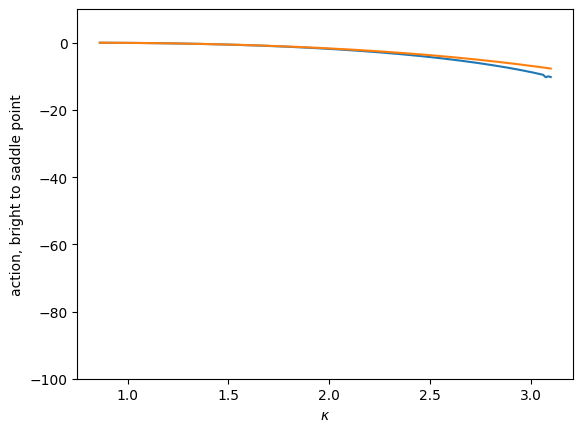

In [17]:
plt.plot(fixed_point_map.kappa_linspace[indexes], actions_list)
plt.plot(fixed_point_map.kappa_linspace[indexes], dykman_actions[1])
plt.xlabel(r'$\kappa$')
plt.ylabel(r'action, bright to saddle point')
plt.ylim([-100,10])

In [8]:
import pandas as pd

In [10]:
actions_series = pd.Series(actions_list, index=fixed_point_map.kappa_linspace[indexes])
actions_series.to_frame().to_parquet('actions_dim_to_saddle.parquet')

In [18]:
dykman_actions_series = pd.Series(dykman_actions[1], index=fixed_point_map.kappa_linspace[indexes])
dykman_actions_series.to_frame().to_parquet('dykman_actions_dim_to_saddle.parquet')

In [19]:
ls

actions_bright_to_saddle.parquet
actions_dim_to_saddle.parquet
calculate-actions-bright-to-saddle.ipynb
calculate-actions-dim-to-saddle.ipynb
dykman_actions_bright_to_saddle.parquet
dykman_actions_dim_to_saddle.parquet
scra.py


(-14.0, 1.0)

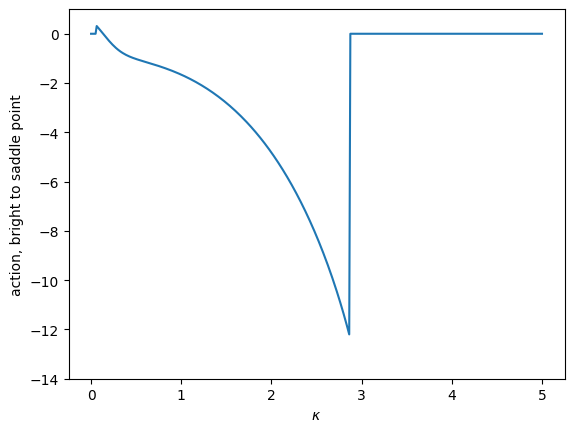

In [3]:
plt.plot(fixed_point_map.kappa_linspace, actions_array)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'action, bright to saddle point')
plt.ylim([-14,1])

In [4]:
from metastable.dykman import dykman_actions_calc

In [5]:
dykman_actions_calc(
    delta=fixed_point_map.delta,
    chi=fixed_point_map.chi,
    eps=fixed_point_map.epsilon_linspace[360],
    kappa=1,
)

(-15.704893498416324, -0.01321609361936019)

In [14]:
dykman_actions_linspace = []

for kappa in fixed_point_map.kappa_linspace:
    dykman_actions_linspace.append(dykman_actions_calc(
    delta=fixed_point_map.delta,
    chi=fixed_point_map.chi,
    eps=fixed_point_map.epsilon_linspace[360],
    kappa=kappa,
    ))

/home/paul/Projects/keldysh/metastable/src/metastable/dykman.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  Omega = delta_omega / Gamma
/home/paul/Projects/keldysh/metastable/src/metastable/dykman.py:126: RuntimeWarning: invalid value encountered in scalar divide
  chi_ph = Gamma_ph / (lam * Gamma)
/home/paul/Projects/keldysh/metastable/src/metastable/dykman.py:109: RuntimeWarning: divide by zero encountered in scalar divide
  Omega = np.abs(delta_omega) / Gamma
/home/paul/Projects/keldysh/metastable/src/metastable/dykman.py:134: RuntimeWarning: invalid value encountered in scalar add
  b_1 = -(beta_1**0.5) * (2 * Y_B_1) ** (-1) * (1 - 2 * (Omega**2) * Y_B_1 + Omega**2)
/home/paul/Projects/keldysh/metastable/src/metastable/dykman.py:135: RuntimeWarning: invalid value encountered in scalar add
  b_2 = -(beta_2**0.5) * (2 * Y_B_2) ** (-1) * (1 - 2 * (Omega**2) * Y_B_2 + Omega**2)


In [15]:
dykman_actions_linspace = np.array(dykman_actions_linspace)

In [13]:
dykman_actions_linspace[100]

array([nan, nan])

(-14.0, 1.0)

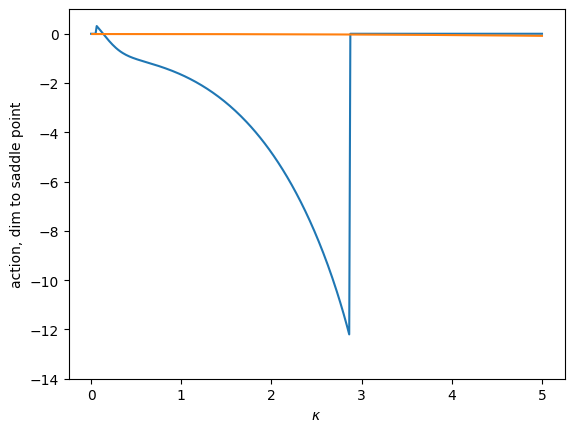

In [21]:
plt.plot(fixed_point_map.kappa_linspace, actions_array)
plt.plot(fixed_point_map.kappa_linspace, dykman_actions_linspace[:,1])
plt.xlabel(r'$\kappa$')
plt.ylabel(r'action, dim to saddle point')
plt.ylim([-14,1])

In [22]:
fixed_point_map.epsilon_linspace[360]

18.0